In [1]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
import sklearn
import sklearn.model_selection
import multiprocessing
from glob import glob
import matplotlib.patches as mpatches

In [13]:
scores_msmlag10ns_splittica_test = np.load('scores_msmlag10ns_splittica_test.npy')

In [14]:
scores_msmlag10ns_splittica_test2 = np.load('scores_msmlag10ns_splittica_fast.npy')

In [ ]:
# # combine the 10 replicates - this saved here for the normal case of one file per set of results
# # to use for the production runs

# models = []
# scores = []

# for model in scores_msmlag10ns_splittica[0][::10]:
#     models.append((model[1], model[2], model[3], model[4]))

# models = np.array(models)

# replicate = 0
# for model_scores in scores_msmlag10ns_splittica[1]:
#     if replicate == 0:
#         all_replicate_scores = []
#     for model_scores_ in model_scores:
#         all_replicate_scores.append(model_scores_)
#     if replicate < 9:
#         replicate += 1
#     elif replicate == 9:
#         scores.append(all_replicate_scores)
#         replicate = 0

# scores = np.array(scores)

# output = [models, scores]

In [15]:
# combine the 10 replicates

models = []
scores = []

for model in scores_msmlag10ns_splittica_test[0][::10]:
    models.append((model[1], model[2], model[3], model[4]))
    
for model in scores_msmlag10ns_splittica_test2[0][::10]:
    models.append((model[1], model[2], model[3], model[4]))    

models = np.array(models)

replicate = 0
for model_scores in scores_msmlag10ns_splittica_test[1]:
    if replicate == 0:
        all_replicate_scores = []
    for model_scores_ in model_scores:
        all_replicate_scores.append(model_scores_)
    if replicate < 9:
        replicate += 1
    elif replicate == 9:
        scores.append(all_replicate_scores)
        replicate = 0
        
replicate = 0
for model_scores in scores_msmlag10ns_splittica_test2[1]:
    if replicate == 0:
        all_replicate_scores = []
    for model_scores_ in model_scores:
        all_replicate_scores.append(model_scores_)
    if replicate < 9:
        replicate += 1
    elif replicate == 9:
        scores.append(all_replicate_scores)
        replicate = 0        

scores = np.array(scores)

output = [models, scores]

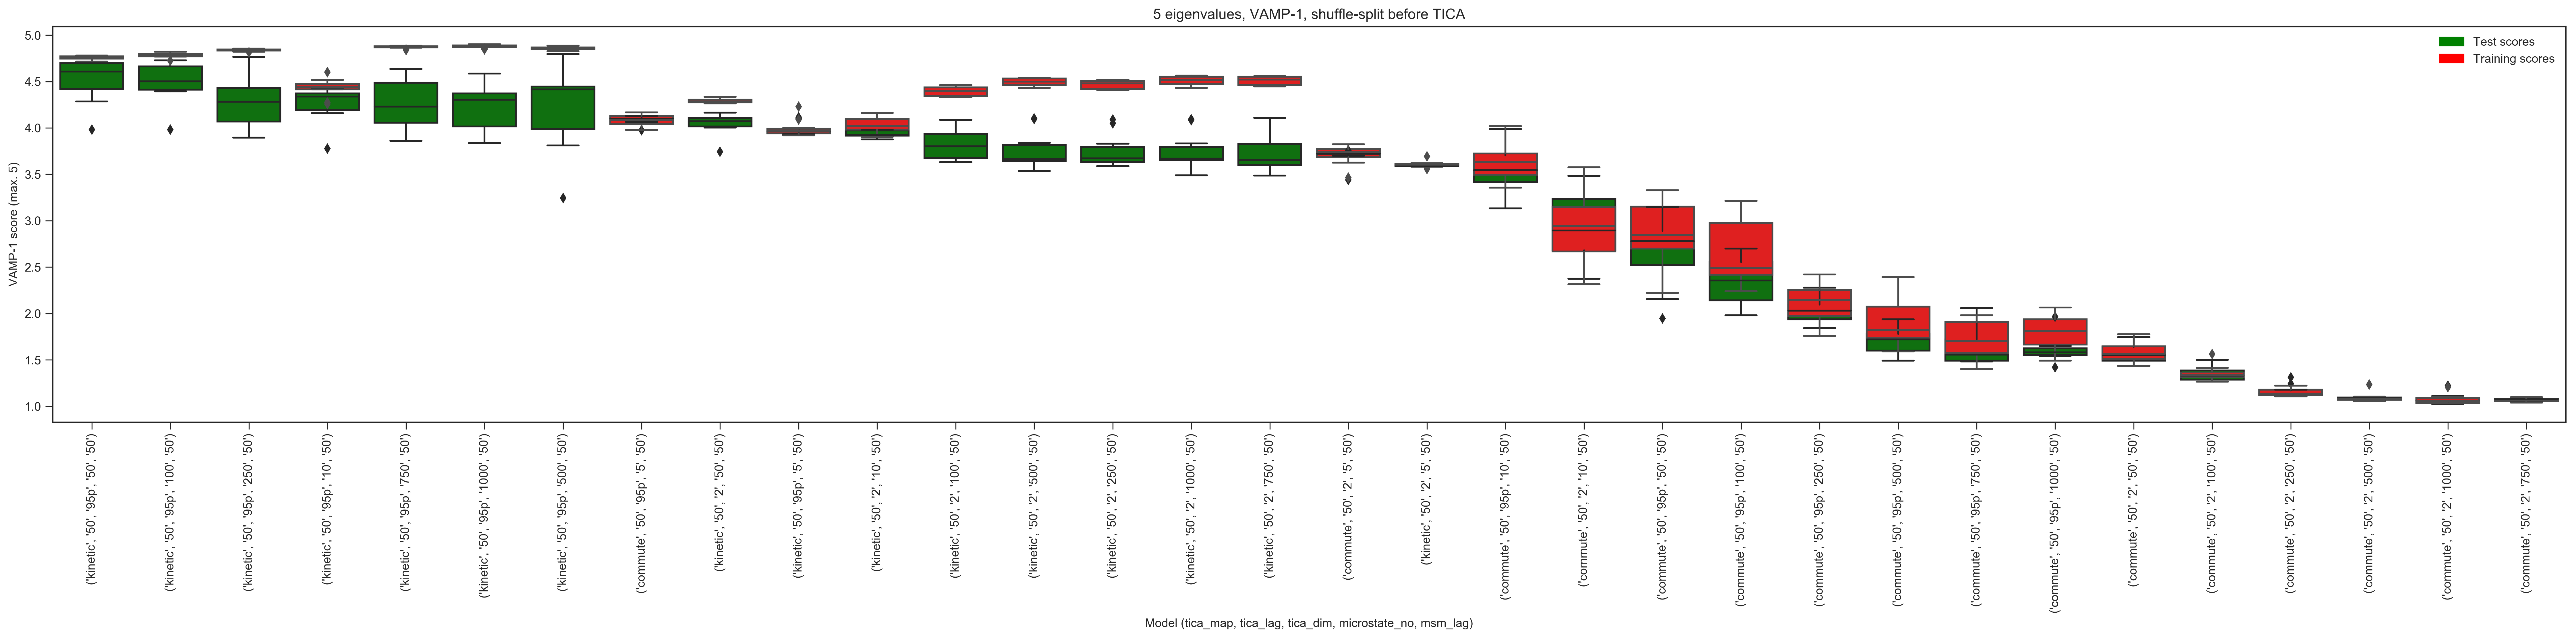

In [16]:
# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[0::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[0::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[0::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[0::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-1 score (max. 5)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('5 eigenvalues, VAMP-1, shuffle-split before TICA')
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_5eigen_vamp1_splittica_test.png', dpi=300)
plt.show()

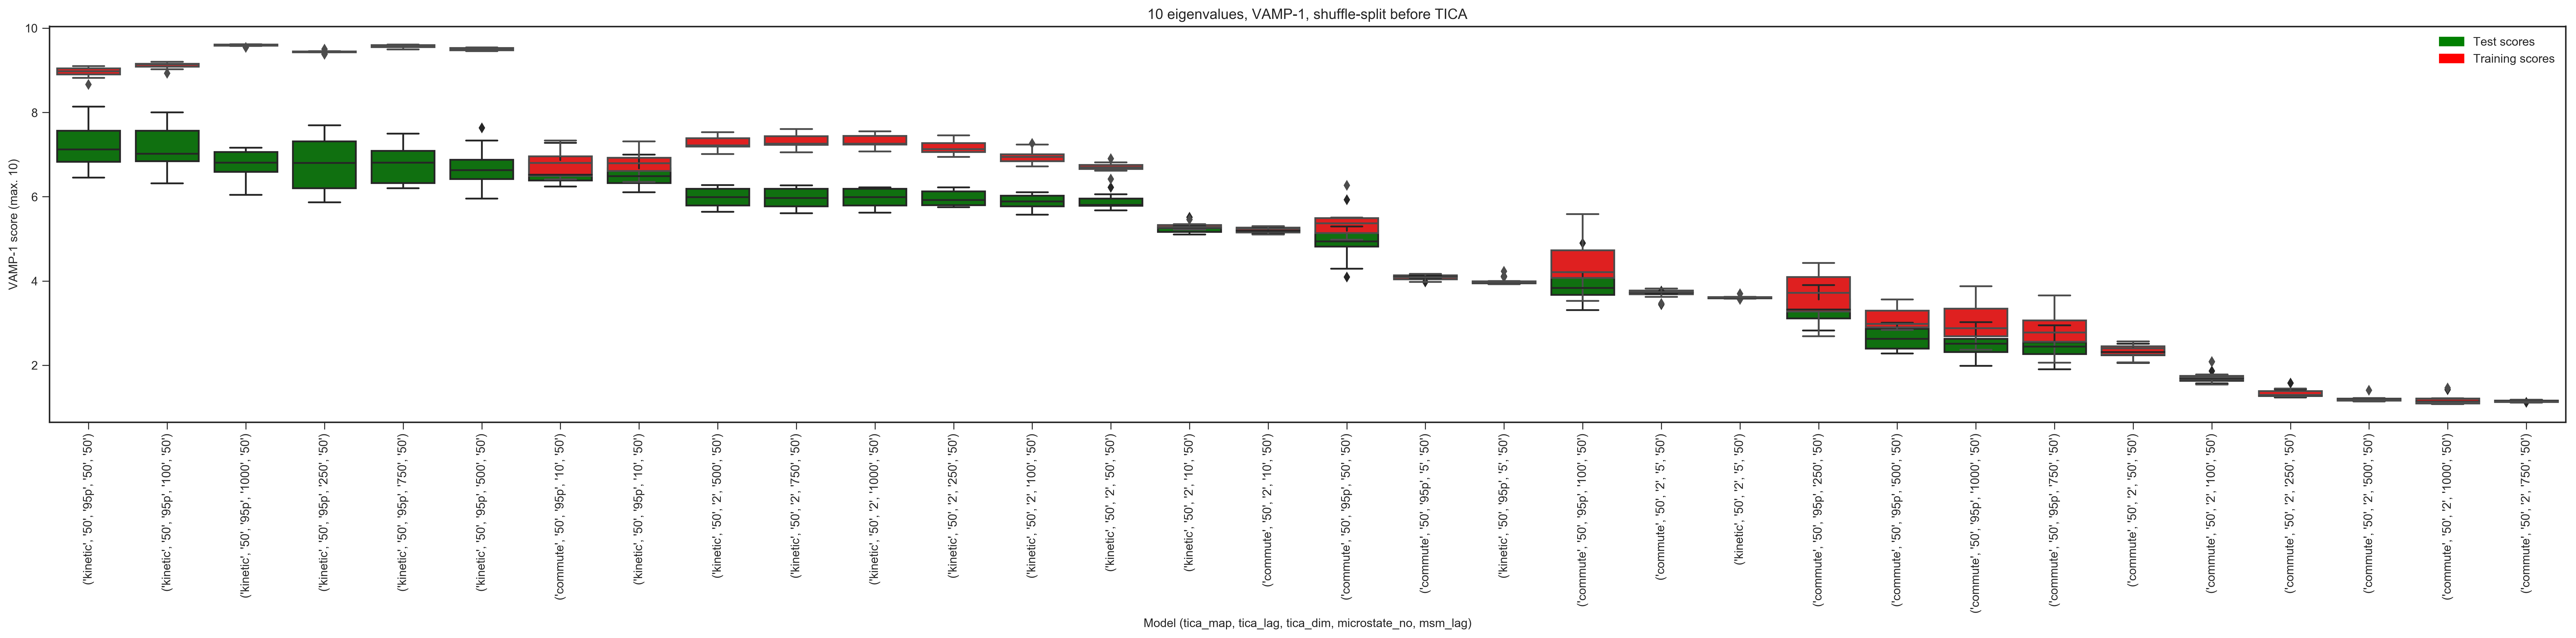

In [17]:
# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[1::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[1::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[1::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[1::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-1 score (max. 10)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('10 eigenvalues, VAMP-1, shuffle-split before TICA')
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_10eigen_vamp1_splittica_test.png', dpi=300)
plt.show()

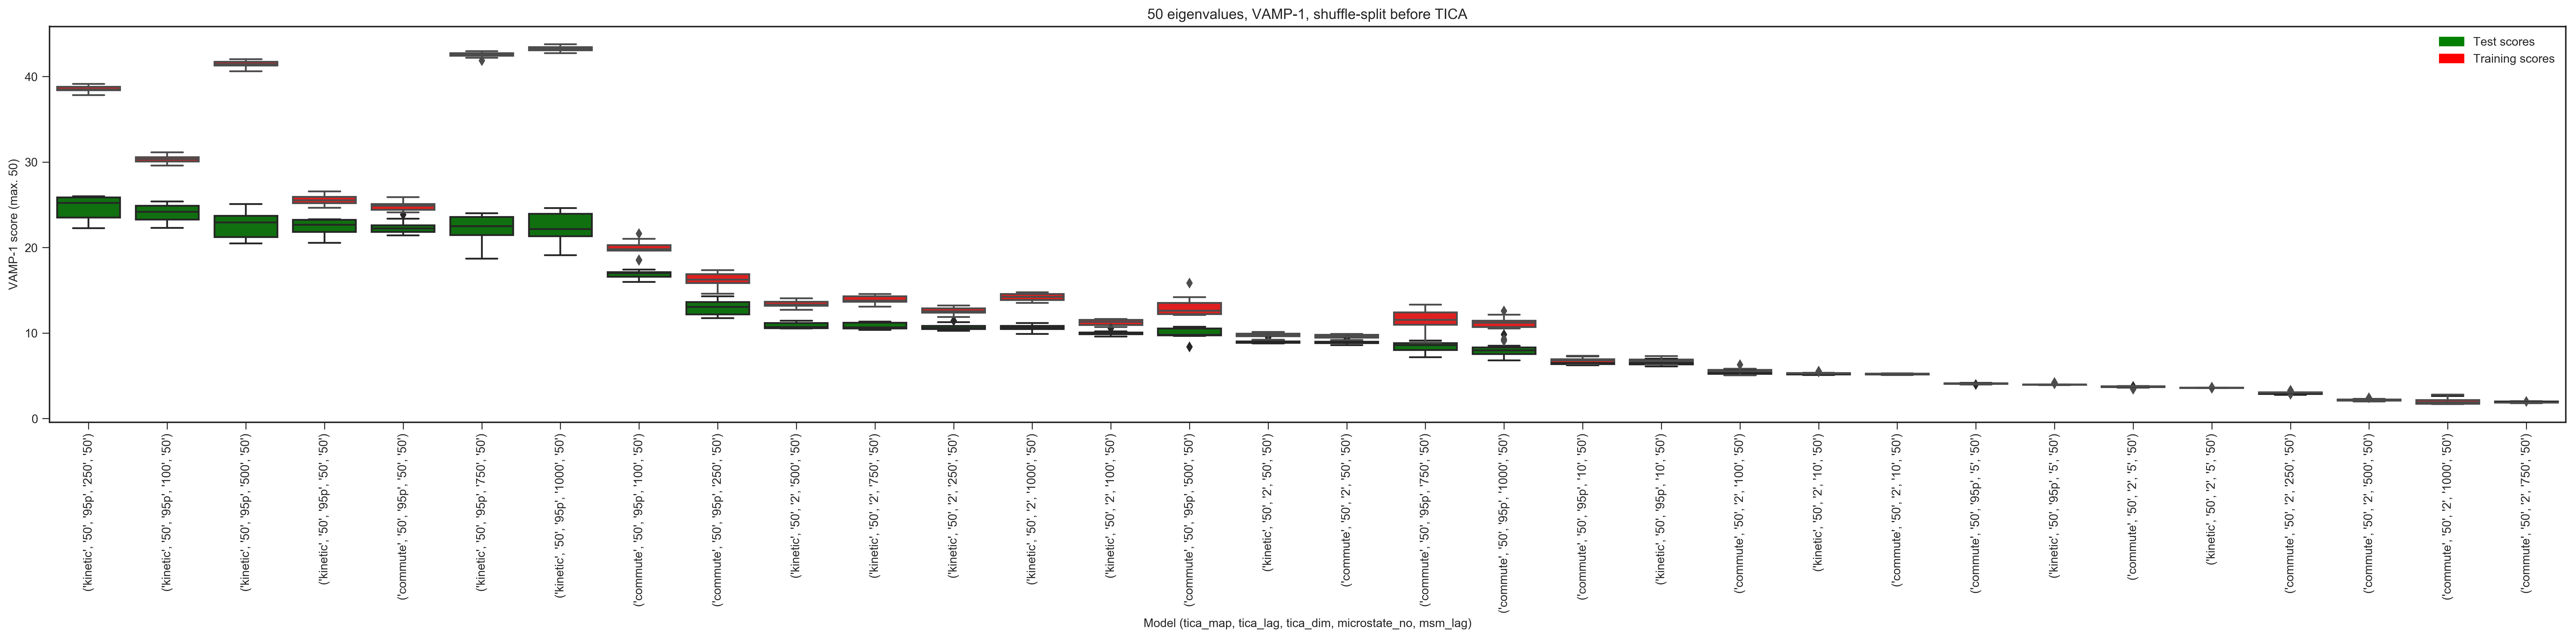

In [18]:
# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[2::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[2::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[2::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[2::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-1 score (max. 50)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('50 eigenvalues, VAMP-1, shuffle-split before TICA')
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_50eigen_vamp1_splittica_test.png', dpi=300)
plt.show()

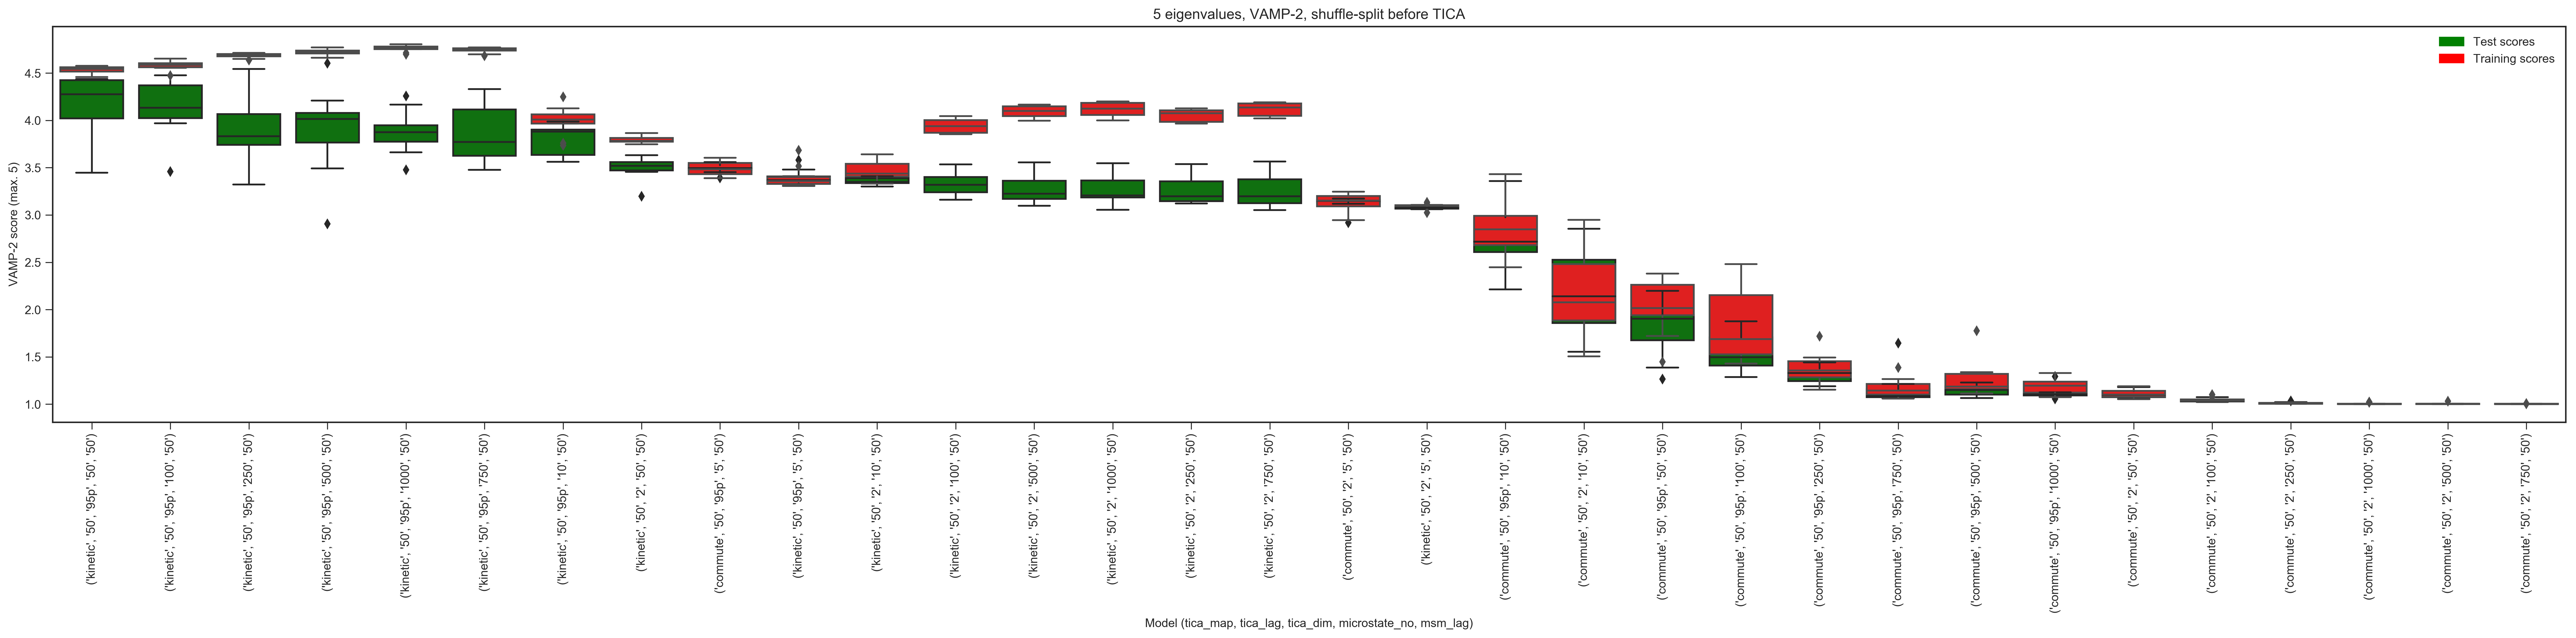

In [19]:
# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[3::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[3::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[3::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[3::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. 5)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('5 eigenvalues, VAMP-2, shuffle-split before TICA')
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_5eigen_vamp2_splittica_test.png', dpi=300)
plt.show()

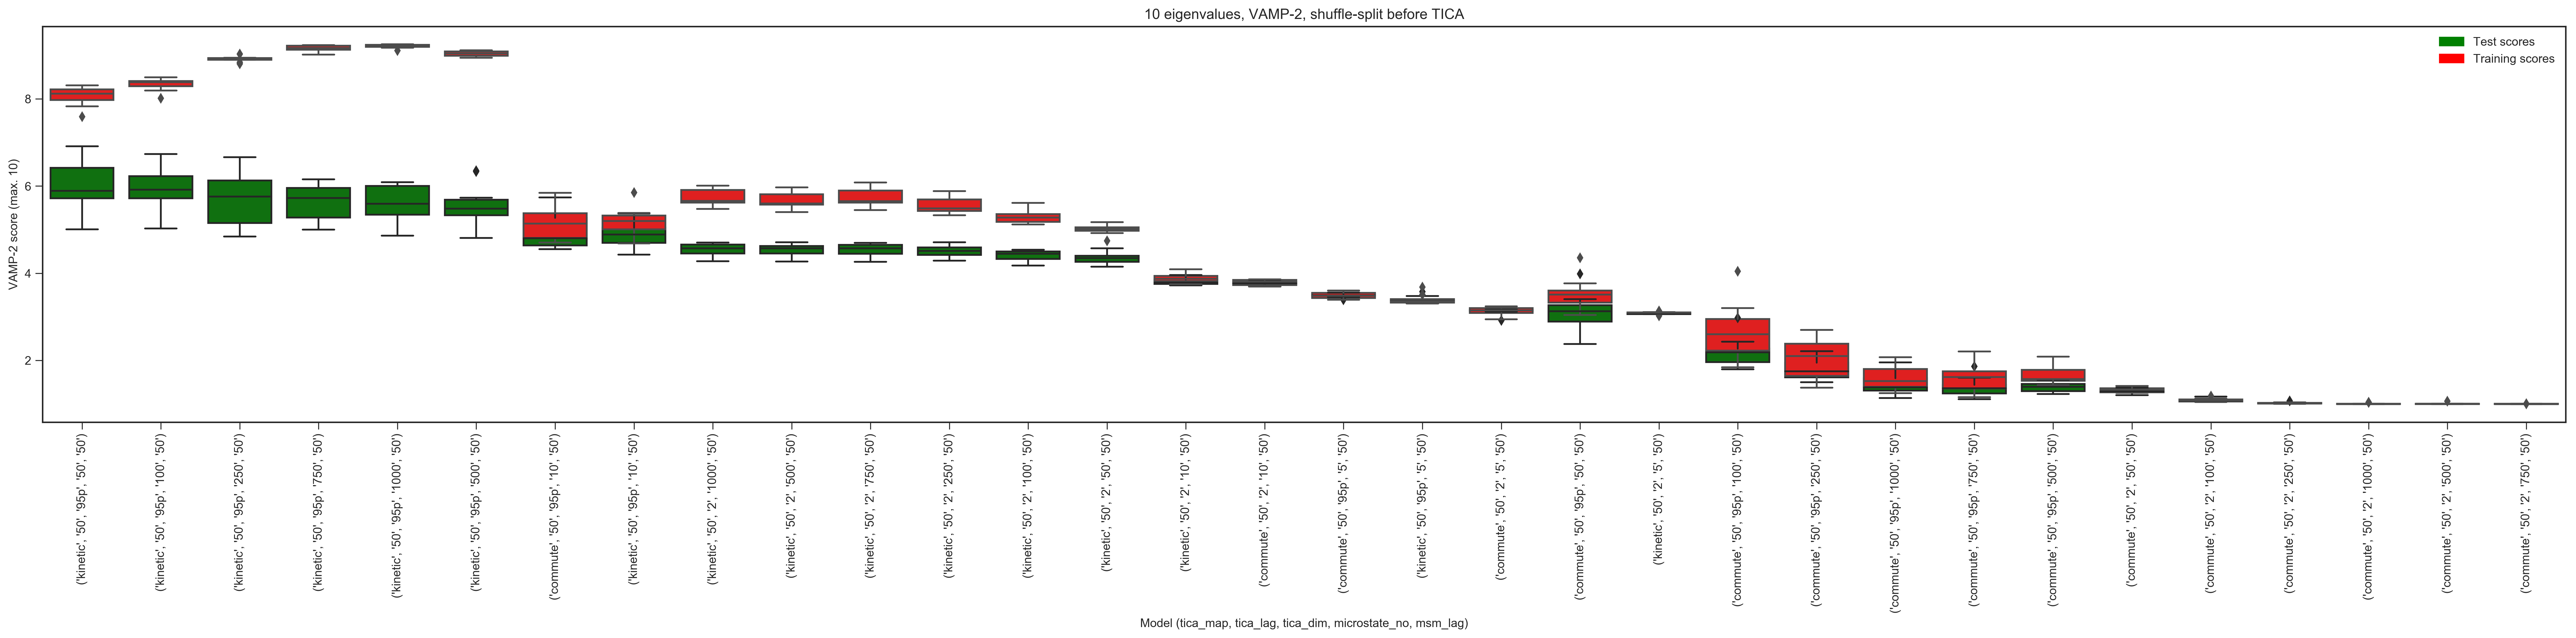

In [20]:
# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[4::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[4::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[4::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[4::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. 10)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('10 eigenvalues, VAMP-2, shuffle-split before TICA')
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_10eigen_vamp2_splittica_test.png', dpi=300)
plt.show()

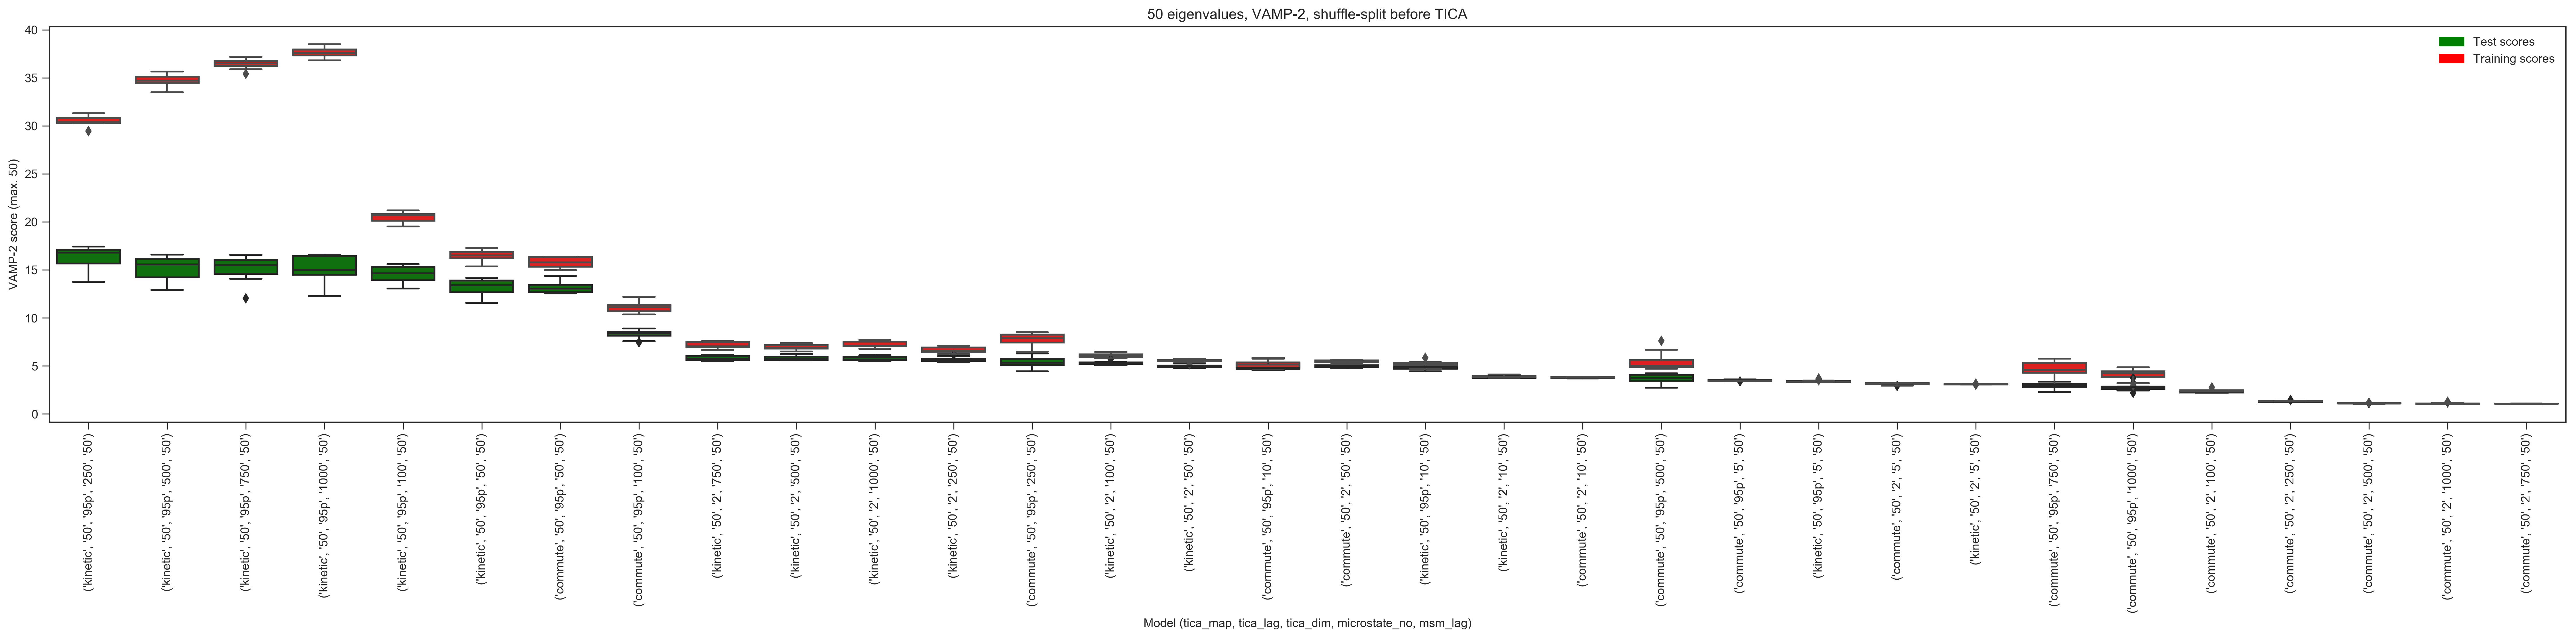

In [21]:
# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[5::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[5::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[5::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[5::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. 50)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('50 eigenvalues, VAMP-2, shuffle-split before TICA')
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_50eigen_vamp2_splittica_test.png', dpi=300)
plt.show()

In [11]:
# now check how many TICs were kept at 95p

In [12]:
output

[array([['50', '95p', '5', '50'],
        ['50', '95p', '10', '50'],
        ['50', '95p', '50', '50'],
        ['50', '95p', '100', '50'],
        ['50', '2', '5', '50'],
        ['50', '2', '10', '50'],
        ['50', '2', '50', '50'],
        ['50', '2', '100', '50']], 
       dtype='<U21'),
 array([[ [(3.9498137470913099, 4.0769075749679144, 3.9494522501083753, 4.0905917865541515), (55, 123)],
         [(3.9498137470913099, 4.0769075749679144, 3.9494522501083753, 4.0905917865541515), (55, 123)],
         [(3.9498137470913099, 4.0769075749679144, 3.9494522501083753, 4.0905917865541515), (55, 123)],
         [(3.3369395418969896, 3.473504839905933, 3.3228085237531304, 3.4807478767750948), (55, 123)],
         [(3.3369395418969896, 3.473504839905933, 3.3228085237531304, 3.4807478767750948), (55, 123)],
         [(3.3369395418969896, 3.473504839905933, 3.3228085237531304, 3.4807478767750948), (55, 123)],
         [(4.1136289539967343, 4.119473135046384, 4.0897547168833492, 4.0282817445

In [ ]:
# kinetic - 57, commute - 125 - out of 153 dimensions